# Convolutional Neural Network

## Import Libraries

In [1]:
#Import some necessary Modules
import os
import numpy as np
import random as rn
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten,Dropout,Conv2D,MaxPool2D
from tensorflow.keras.backend import resize_images

In [3]:
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

## Importing the dataset

In [4]:
print(os.listdir("./"))

['.ipynb_checkpoints', 'fig.png', 'Malaria Parasitized Vs Uninfected Classification.ipynb', 'Parasitized_1000', 'Psoriasis Vs Vitiligo Classification.ipynb', 'Uninfected_1000']


In [13]:
def image_loader(dr):
    IMG_list = []
    read = lambda im: np.asarray(Image.open(im).
                                 convert("RGB").resize((64, 64)))
    for image_file in os.listdir(dr):
        Path = os.path.join(dr,image_file)
        _, ftype = os.path.splitext(Path)
        if ftype == ".png":
            img = read(Path)
            IMG_list.append(np.array(img)/255.)          
           
            
    return IMG_list


In [14]:
Parasitized = np.array(image_loader('./Parasitized_1000'))
Uninfected = np.array(image_loader('./Uninfected_1000'))

In [15]:
Uninfected_label = np.zeros(len(Uninfected))
Parasitized_label = np.ones(len(Parasitized))


In [16]:
Parasitized.shape

(1000, 64, 64, 3)

## Splitting the dataset into the Training set and Test set

In [17]:
# Merge data 
X = np.concatenate((Uninfected, Parasitized), axis = 0)
y = np.concatenate((Uninfected_label, Parasitized_label), axis = 0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


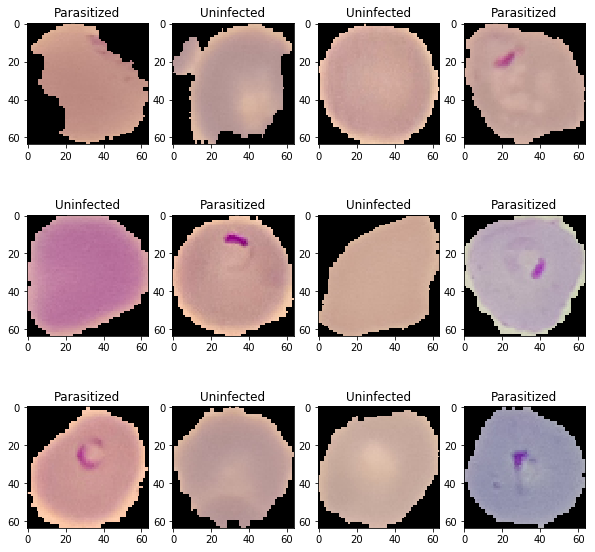

In [22]:

fig=plt.figure(figsize=(10,10))


for i in range(1, 13):
    ax = fig.add_subplot(3, 4, i)
    if y_train[i] == 0:
        ax.title.set_text('Uninfected')
    else:
        ax.title.set_text('Parasitized')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

## Building Model

In [27]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 64)        9280      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 12544)            

## Traning Model

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.fit(x=X_train, 
          y=y_train, 
          epochs=400,
          batch_size= 8,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 1400 samples, validate on 600 samples
Epoch 1/400
1400/1400 [==============================] - 6s 4ms/sample - loss: 0.7617 - accuracy: 0.5771 - val_loss: 0.6414 - val_accuracy: 0.7083
Epoch 2/400
1400/1400 [==============================] - 3s 2ms/sample - loss: 0.6259 - accuracy: 0.6393 - val_loss: 0.6138 - val_accuracy: 0.7183
Epoch 3/400
1400/1400 [==============================] - 3s 2ms/sample - loss: 0.6082 - accuracy: 0.6614 - val_loss: 0.5872 - val_accuracy: 0.6800
Epoch 4/400
1400/1400 [==============================] - 2s 2ms/sample - loss: 0.6205 - accuracy: 0.6614 - val_loss: 0.6016 - val_accuracy: 0.6833
Epoch 5/400
1400/1400 [==============================] - 3s 2ms/sample - loss: 0.5919 - accuracy: 0.6779 - val_loss: 0.5954 - val_accuracy: 0.6950
Epoch 6/400
1400/1400 [==============================] - 3s 2ms/sample - loss: 0.5731 - accuracy: 0.6943 - val_loss: 0.6123 - val_accuracy: 0.6067
Epoch 7/400
1400/1400 [==============================] - 3s 2ms/sample 

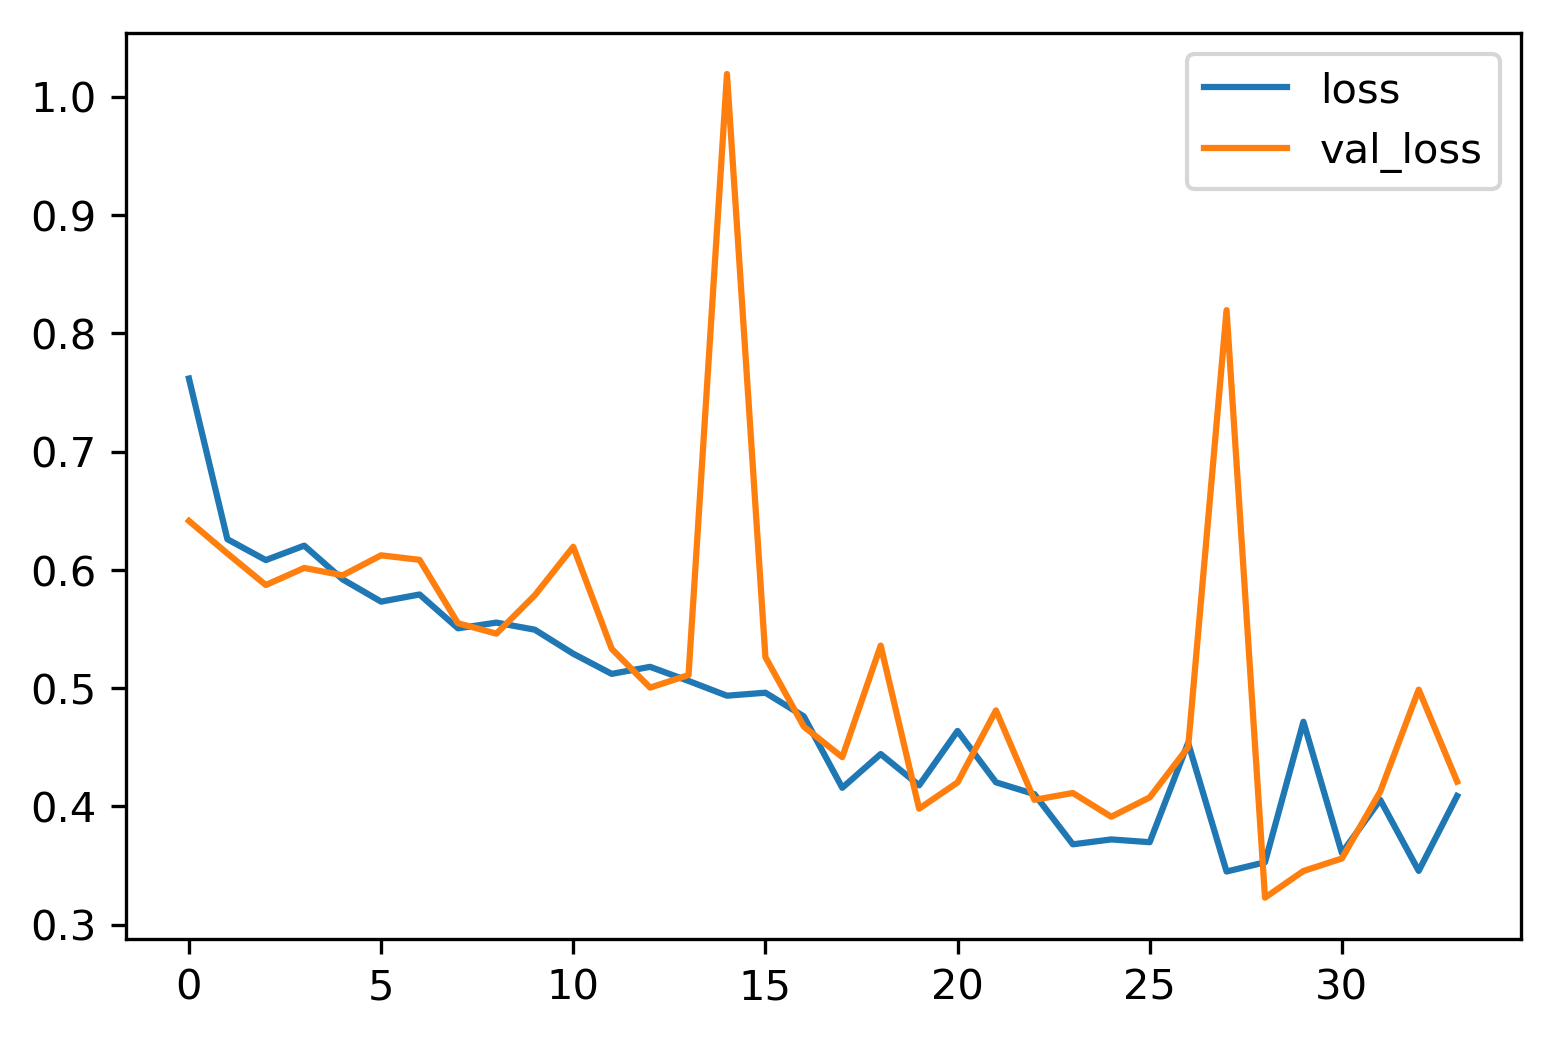

In [29]:
import pandas as pd
model_loss = pd.DataFrame(model.history.history)
model_loss[['loss','val_loss']].plot()

## Model Evaluation

In [30]:
predictions = model.predict_classes(X_test)
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[226  76]
 [ 31 267]]
              precision    recall  f1-score   support

         0.0       0.88      0.75      0.81       302
         1.0       0.78      0.90      0.83       298

    accuracy                           0.82       600
   macro avg       0.83      0.82      0.82       600
weighted avg       0.83      0.82      0.82       600

